# Data Analysis

In [38]:
import pandas as pd
import re
from glob import glob
import numpy as np
import os
import statsmodels as sm
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt

In [2]:
dfg = pd.read_csv('dataset_gemeente.csv')

## Data Exploration

### Migration

Migration Population

In [8]:
des = dfg.groupby('RegioS')['migration_pop_all_total'].describe()
des.sort_values.plot(y='mean')

count       mean       std        min        25%  \
RegioS                                                                       
Urk                        10.0   1.561006  0.237247   1.299836   1.419616   
Tubbergen                  10.0   1.615067  0.145669   1.450028   1.525894   
Grootegast                  9.0   1.689846  0.240411   1.243720   1.658005   
Littenseradiel              8.0   1.703250  0.172298   1.563921   1.629215   
Achtkarspelen              10.0   1.738916  0.336491   1.324409   1.485978   
...                         ...        ...       ...        ...        ...   
Amstelveen                 10.0  23.540129  2.710376  20.491976  21.487868   
Rotterdam                  10.0  27.391499  0.571232  26.795339  27.047210   
Amsterdam                  10.0  29.392742  1.293577  28.438206  28.554474   
's-Gravenhage (gemeente)   10.0  30.316265  1.370091  28.559645  29.431486   
Vaals                      10.0  34.114203  1.960423  32.536670  32.750221   

                                50%        75%        max  
RegioS                                                     
Urk                        1.489000   1.610548   2.045630  
Tubbergen                  1.553817   1.741290   1.847152  
Grootegast                 1.678208   1.727684   2.124681  
Littenseradiel             1.641290   1.690907   2.103108  
Achtkarspelen              1.642906   2.031702   2.272727  
...                             ...        ...        ...  
Amstelveen                22.658542  25.353788  28.319646  
Rotterdam                 27.152371  27.664194  28.577855  
Amsterdam                 28.691258  29.882064  32.148581  
's-Gravenhage (gemeente)  29.956491  31.131830  32.757938  
Vaals                     33.177977  34.926322  38.208482  

[307 rows x 8 columns]

<AxesSubplot:ylabel='Frequency'>

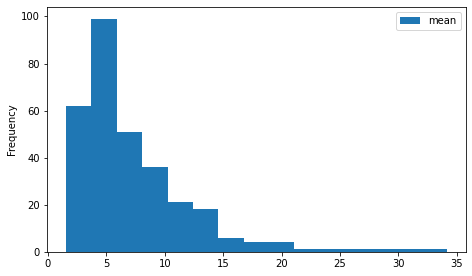

In [18]:
des.plot(y='mean', kind='hist', bins=(15), figsize=(7.5,4.5))

# most gemeentes have a migrant population of 5 to 10 percent

Migration Change

<AxesSubplot:ylabel='Frequency'>

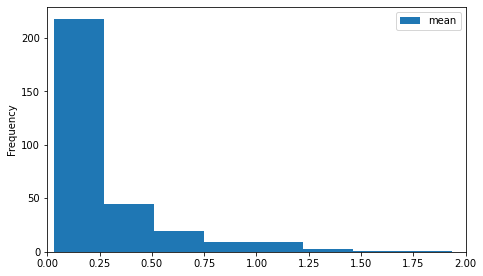

In [26]:
des = dfg.groupby('RegioS')['migration_change_all'].describe()
des.plot(y='mean', kind='hist', bins=(30), xlim = (0,2), figsize=(7.5,4.5))

# Most gemeentes experience a growth of their migrant population of 0 to 0.5 per 100 gemeente population per year

### Import Shock

Manufacturing Employment

<AxesSubplot:ylabel='Frequency'>

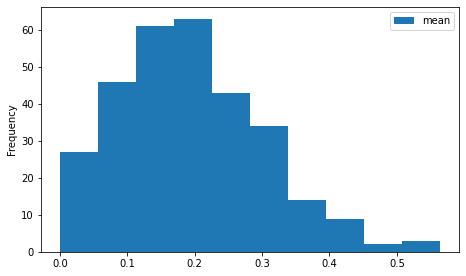

In [28]:
des = dfg.groupby('RegioS')['manufacturing_weight'].describe()
des.plot(y='mean', kind='hist', bins=(10), figsize=(7.5,4.5))

Import Shock

<AxesSubplot:ylabel='Frequency'>

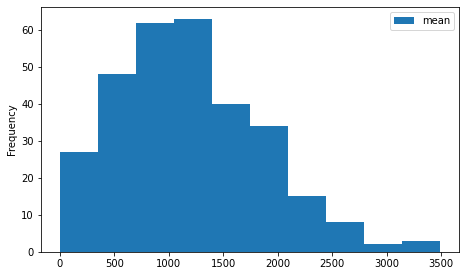

In [27]:
des = dfg.groupby('RegioS')['import_shock_2yr'].describe()
des.plot(y='mean', kind='hist', bins=(10), figsize=(7.5,4.5))

## Regression Analyses

In [ ]:
# Check out link for looping over OLS: https://stackoverflow.com/questions/52539749/python-loop-a-variable-for-a-simple-ols
# Look for multilevel regression, data nested within gemeentes
# Also store results in dict
# Also print results in folder per group of independent variables
# To loop over linear mixed effects I probably need to use something like f"{coly} ~ {colx}" together with list of columns of interest


In [58]:
formula = 'income_median_men ~ import_shock_2yr"

In [64]:
model = smf.ols('income_median_men ~ import_shock_2yr', data=dfg)

PatsyError: model is missing required outcome variables

In [36]:
model.params

Intercept           28022.219603
import_shock_2yr       -0.094238
dtype: float64

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      income_median_men   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.058
Date:                Fri, 27 Aug 2021   Prob (F-statistic):             0.0139
Time:                        16:19:14   Log-Likelihood:                -22571.
No. Observations:                2384   AIC:                         4.515e+04
Df Residuals:                    2382   BIC:                         4.516e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.802e+04     99.738    280.959      0.000    2.78e+04    2.82e+04
import_shock_2yr    -0.0942      0.038     -2.461      0.014      -0.169      -0.019
==============================================================================
Omnibus:                      174.313   Durbin-Watson:                   0.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.417
Skew:                           0.635   Prob(JB):                     5.60e-51
Kurtosis:                       3.846   Cond. No.                     4.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
# Only rows where import shock and median not missing
dfg1 = dfg[(dfg.import_shock_2yr.notna()) & (dfg.income_median_men.notna())]

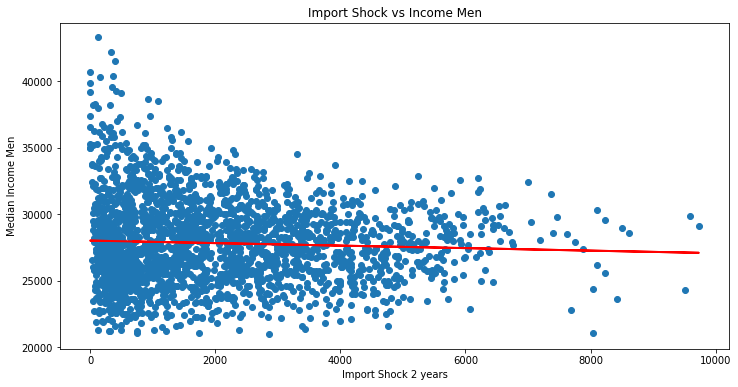

In [56]:
income_pred = model.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(dfg1['import_shock_2yr'], dfg1['income_median_men'], 'o')           # scatter plot showing actual data
plt.plot(dfg1.import_shock_2yr, income_pred, 'r', linewidth=2)   # regression line
plt.xlabel('Import Shock 2 years')
plt.ylabel('Median Income Men')
plt.title('Import Shock vs Income Men')

plt.show()